# link to different filters descriptions https://www.naturefocused.com/articles/photography-image-processing-kernel.html

In [29]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import skimage
from skimage import img_as_float, img_as_ubyte
import pandas as pd

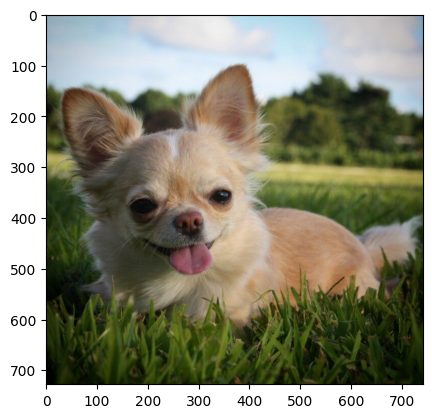

In [30]:
img = cv2.imread('img.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB));

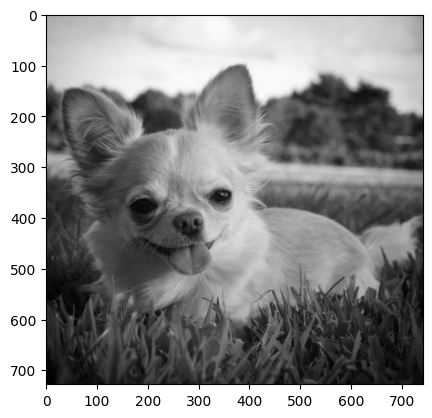

In [31]:
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap = 'gray');

In [32]:
def increase_size(img, kernel, incr_method=1):
    im = img.copy()
    add = (kernel.shape[0]//2, kernel.shape[1]//2)
    im_res = np.zeros((im.shape[0] + add[0]*2, im.shape[1] + add[1]*2))
    im_res[add[0]:-add[0], add[1]:-add[1]] = im
    
    if (incr_method == 1):
        #continue
        for i in range(0, add[0]):
            im_res[i, :] = im_res[add[0], :]
            im_res[-1-i, :] = im_res[-add[0]-1, :]
        for j in range(0, add[1]):
            im_res[:, j] = im_res[:, add[1]]
            im_res[:, -1-j] = im_res[:, -add[1]-1]
        return im_res, add
    else:
        #mirror
        for i in range(0, add[0]):
            im_res[i, :] = im_res[add[0]*2-1-i, :]
            im_res[-add[0]+i, :] = im_res[-add[0]-1 - i, :]
        for j in range(0, add[1]):
            im_res[:, j] = im_res[:, add[1]*2-1-j]
            im_res[:, -add[1]+j] = im_res[:, -add[1]-1 - j]
        return im_res, add
        
def channel_filter(img, kernel, incr_method=1):
    sz = (img.shape[0], img.shape[1])
    im_res = img.copy()
    im, add = increase_size(img, kernel, incr_method)
    for i in range(0, sz[0]):
        for j in range(0, sz[1]):
            im_res[i, j] = (im[i:i + kernel.shape[1], j:j + kernel.shape[1]] * kernel).sum()
    return im_res
    
def img_filter(img, kernel, incr_method=1):
    kernel = kernel / kernel[np.where(kernel>0)].sum()
    im = img.copy()
    base = 1 - kernel.sum()
    for color in range(0, 3):
        im[:,:,color] = np.clip(im[:, :, color]*base + channel_filter(img[:,:,color], kernel, incr_method), 0, 1)
    return im

In [33]:
kernel = np.zeros(101*101).reshape(101,101)

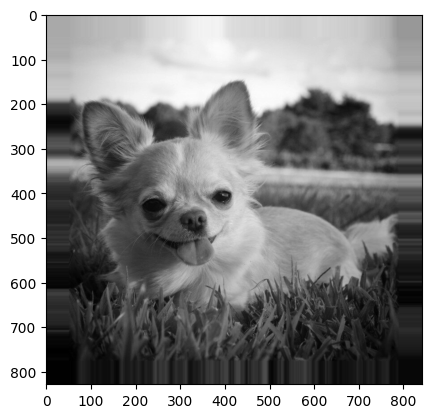

In [34]:
im_temp, a = increase_size(img_gray, kernel)
plt.imshow(im_temp, cmap = 'gray');

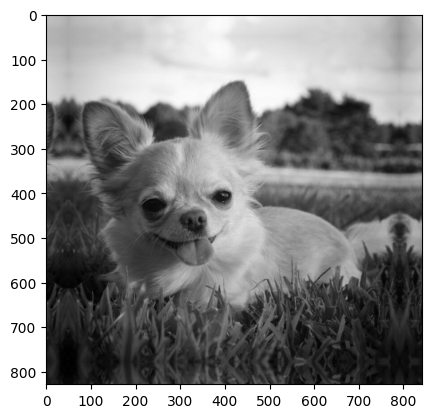

In [35]:
im_temp, a = increase_size(img_gray, kernel, 2)
plt.imshow(im_temp, cmap = 'gray');

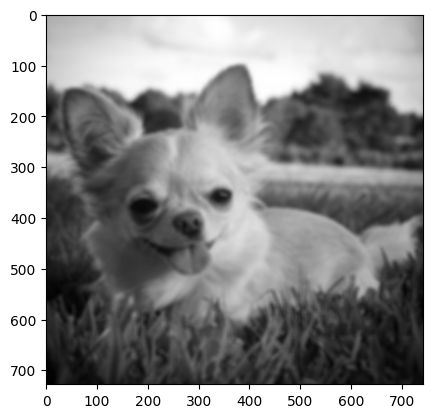

In [54]:
kernel = np.ones(9*9).reshape(9,9)

im_temp = img_as_ubyte(channel_filter(img_as_float(img_gray), kernel / 81))
plt.imshow(im_temp, cmap = 'gray');

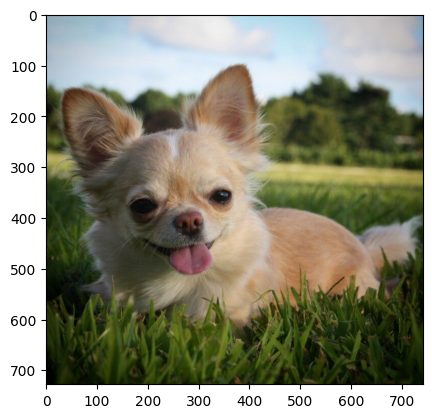

In [37]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB));

In [38]:
img = img_as_float(img)

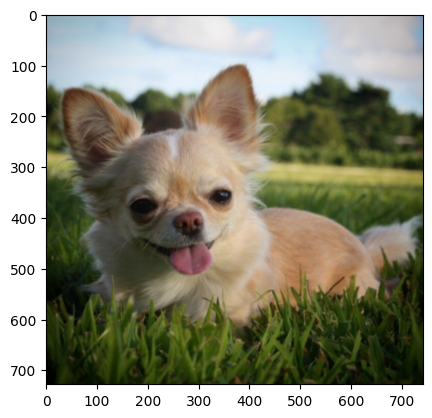

In [39]:
img_new = img_as_ubyte(img_filter(img, kernel))
plt.imshow(cv2.cvtColor(img_new, cv2.COLOR_BGR2RGB));

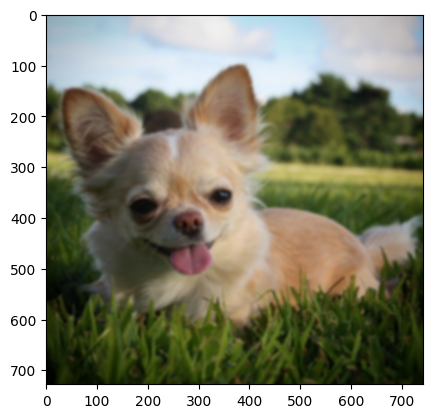

In [40]:
kernel = np.array([
        [1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1],
        [1, 1, 1, 1, 1, 1, 1]
    ])
img_new = img_as_ubyte(img_filter(img, kernel))
plt.imshow(cv2.cvtColor(img_new, cv2.COLOR_BGR2RGB));

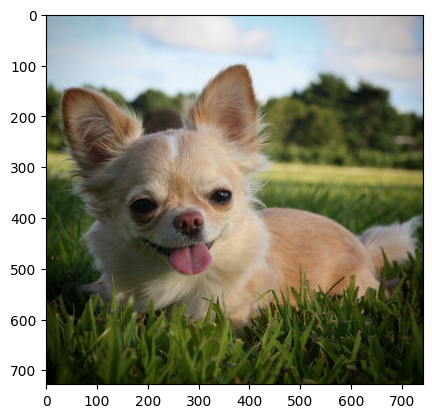

In [41]:
kernel = np.array([
    [-1,-1,-1],
    [-1,9,-1],
    [-1,-1,-1]])
img_new = img_as_ubyte(img_filter(img, kernel))
plt.imshow(cv2.cvtColor(img_new, cv2.COLOR_BGR2RGB));

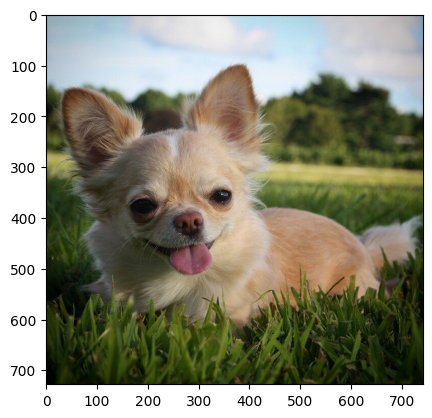

In [42]:
kernel = np.array([
    [0,-1,0],
    [-1,5,-1],
    [0,-1,0]])
img_new = img_as_ubyte(img_filter(img, kernel))
plt.imshow(cv2.cvtColor(img_new, cv2.COLOR_BGR2RGB));

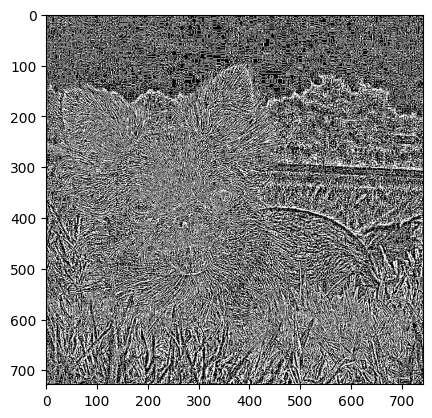

In [51]:
kernel = np.array([
    [0,0,0,0,0],
    [0,0,-1,0,0],
    [0,-1,4,-1,0],
    [0,0,-1,0,0],
    [0,0,0,0,0]
])
img_new = img_as_ubyte(channel_filter(img_gray, kernel))
plt.imshow(cv2.cvtColor(img_new, cv2.COLOR_BGR2RGB));